In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# 1) Read data
df = pd.read_csv('commodities.csv')

# 2) Use column date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index()

# Format the data
df2 = pd.read_csv('commodities.csv', header=0, index_col=0)

df2.rename(columns={'ZC=F_Adj Close': 'Corn Futures', 
                    'ZW=F_Adj Close': 'Wheat Futures',
                    'ZS=F_Adj Close': 'Soybean Futures',
                    'KC=F_Adj Close': 'Coffee Futures',
                    'CC=F_Adj Close': 'Cocoa Futures'}, inplace=True)

prices = df2[['Corn Futures','Wheat Futures','Soybean Futures','Coffee Futures','Cocoa Futures']]
log_prices = np.log(prices)
nb_obs, nb_assets = log_prices.shape
col_names = log_prices.columns.tolist()

In [3]:
log_prices

,Corn Futures,Wheat Futures,Soybean Futures,Coffee Futures,Cocoa Futures
Date,,,,,
2014-01-02,6.041444,6.391917,7.160069,4.713127,7.877018
2014-01-03,6.048554,6.406467,7.161816,4.756603,7.900637
2014-01-06,6.058539,6.406467,7.167616,4.795791,7.888710
2014-01-07,6.054439,6.401088,7.169735,4.764308,7.891705
2014-01-08,6.033086,6.378002,7.170696,4.794964,7.901007
...,...,...,...,...,...
2022-01-25,6.429719,6.706862,7.249393,5.471850,7.825245
2022-01-26,6.440947,6.678342,7.272398,5.476045,7.829233
2022-01-27,6.438152,6.655440,7.278111,5.446953,7.804251


In [4]:
log_prices2 = np.log(df2 / df2.shift(1))
log_prices2

/Users/victoriawong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,ZC=F_High,ZC=F_Low,ZC=F_Open,ZC=F_Close,ZC=F_Volume,Corn Futures,ZW=F_High,ZW=F_Low,ZW=F_Open,ZW=F_Close,...,KC=F_Open,KC=F_Close,KC=F_Volume,Coffee Futures,CC=F_High,CC=F_Low,CC=F_Open,CC=F_Close,CC=F_Volume,Cocoa Futures
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.007636,-0.003591,-0.003561,0.007109,-0.212517,0.007109,0.006177,0.000839,-0.013730,0.014550,...,0.004044,0.043476,0.404303,0.043476,0.007002,0.001520,-0.020943,0.023619,-0.114109,0.023619
2014-01-06,0.009390,0.015467,0.007109,0.009985,-0.131283,0.009985,0.006139,0.014988,0.018677,0.000000,...,0.043867,0.039188,0.300086,0.039188,-0.002206,0.008697,0.023161,-0.011927,-0.298673,-0.011927
2014-01-07,0.004662,0.004124,0.008230,-0.004100,0.252891,-0.004100,-0.004498,-0.005386,-0.002470,-0.005380,...,0.042023,-0.031482,0.195623,-0.031482,-0.007388,0.002632,-0.014506,0.002995,-0.138407,0.002995
2014-01-08,-0.005246,-0.025001,-0.004107,-0.021353,0.575385,-0.021353,-0.004518,-0.025243,-0.005788,-0.023086,...,-0.033050,0.030655,-0.243320,0.030655,0.006652,0.002251,0.005977,0.009302,-0.027315,0.009302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,0.015170,0.015068,0.004040,-0.001612,0.426402,-0.001612,0.035499,0.031406,0.008777,0.021626,...,-0.010372,0.021027,-0.368917,0.021027,-0.020393,-0.001606,-0.025627,0.004003,-0.199901,0.004003
2022-01-26,-0.005164,-0.005675,-0.001614,0.011227,-0.546732,0.011227,-0.016980,-0.017008,0.020084,-0.028520,...,0.015203,0.004195,-0.691789,0.004195,0.004349,0.003210,0.000399,0.003987,-0.262407,0.003987
2022-01-27,0.000000,0.010111,0.009646,-0.002795,-0.129811,-0.002795,-0.027280,-0.016656,-0.028547,-0.022902,...,-0.005674,-0.029092,0.948893,-0.029092,-0.015104,-0.023101,-0.008419,-0.024981,0.307406,-0.024981


In [5]:
def simulate_time_series(df):
    L = len(df)  # length of series
    time_series = [100]
    # 1.  Simulate a time series of T error terms ε(i)t, t = 1, . . . , T distributed as N(0, 1). T is the length of your series.
    errors =np.random.normal(0, 1, L)
        # 2. Compute a time series of prices, assuming that they are driven by a random walk p(i) = p(i) + ε(i)
    for j in range(1, L):
        time_series.append(time_series[j - 1] + errors[j])
    return time_series

def Estimate_linear_relationships(x, y):
    LR = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
    Beta = LR.coef_[0]
    Alpha = LR.intercept_
    residuals = np.array(y) - Beta * np.array(x) - Alpha
    
    return Alpha, Beta, residuals

def compute_t_stat( time_series, teta, residuals,nb_obs):
    var = (1 / (nb_obs-2)) * np.sum(np.power(residuals, 2))
    t_stat = ((teta - 1) / (np.power(var / np.sum(np.power(time_series[:-1] - np.mean(time_series), 2)), 0.5)))
    return t_stat

def df_test(df,T):   
    t_stats = []
    nb_obs = len(df)
    for i in range(T):
        # 1.  Simulate a time series of T error terms ε(i)t, t = 1, . . . , T distributed as N(0, 1). T is the length of your series.
        # 2. Compute a time series of prices, assuming that they are driven by a random walk p(i) = p(i) + ε(i)
        z = simulate_time_series(df)
        # 3. Estimate the AR(1) model p(i) = μ(i) + ø(i)p(i-1) + ε(i)
        mu,teta,residuals = Estimate_linear_relationships(z[:-1], z[1:])
        # 4. Compute the test statistic t(ø(i) − 1) for the null hypothesis of the DF test
        t_stat = compute_t_stat( z, teta, residuals,nb_obs)
        t_stats.append(t_stat)

def get_critical_values(t_stats):
    critical_values = []
    percentages = [0.01, 0.05, 0.1]
    for i in percentages:
        quantile = np.quantile(t_stats, i)
        critical_values.append(quantile)
        print("The critical value corresponding to the quantile at: " + 
              "{}".format(i) + " of the distribution is " + "{}".format(quantile))
    return critical_values

def spread(x, y):
    
    alpha, beta , z = Estimate_linear_relationships(x, y)
    std = np.std(z)
    signal = z / std
    return signal

# PART 1 - Stationarity

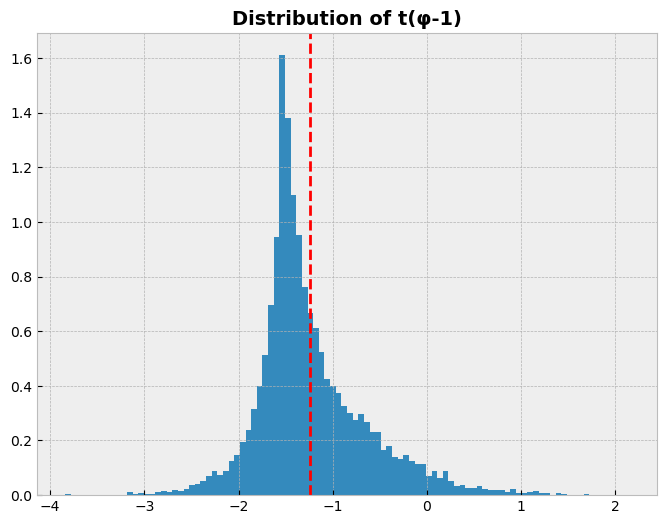

The critical value corresponding to the quantile at: 0.01 of the distribution is -2.4646049927865907
The critical value corresponding to the quantile at: 0.05 of the distribution is -1.987746664086833
The critical value corresponding to the quantile at: 0.1 of the distribution is -1.7969212220940338


In [6]:
# 1.1 Critical values

# TODO Q1.5 Plot an histogram for the N values of t(ø(i) − 1)
N = 10000  # number of replications
T = len(df)  # length of series
x = [0]
t_stat1_5 = []


# 1.  Simulate a time series of T error terms ε(i)t, t = 1, . . . , T distributed as N(0, 1). T is the length of your series.
for i in range(N):
    errors =np.random.normal(0, 1, T)
    
    
# 2. Compute a time series of prices, assuming that they are driven by a random walk p(i) = p(i) + ε(i)
    for j in range(1, T):
        x.append(x[j - 1] + errors[j])
        
        
# 3. Estimate the AR(1) model p(i) = μ(i) + ø(i)p(i) + ε(i)
    AR1_1_5 = LinearRegression().fit(np.array(x[:-1]).reshape(-1, 1), x[1:])
    teta1_5 = AR1_1_5.coef_[0]
    mu1_5 = AR1_1_5.intercept_
    residuals1_5 = np.array(x[1:]) - teta1_5 * np.array(x[:-1] - mu1_5)
    
    
# 4. Compute the test statistic t(ø(i) − 1) for the null hypothesis of the DF test
    var1_5 = (1 / (T-2)) * np.sum(np.power(residuals1_5, 2))
    t_stat = ((teta1_5 - 1) / (np.power(var1_5 / np.sum(np.power(x[:-1] - np.mean(x), 2)), 0.5)))
    t_stat1_5.append(t_stat)
    x = [100]

# Get the p-value for each pair
w = 0
for i in range(len(t_stat1_5)):
    if t_stat1_5[i - 1] <= t_stat:
        w += 1
p_value1_5 = w / len(t_stat1_5)

# Q1.5 Plot an histogram for the N values of t(ø(i) − 1), i =,1...,N
plt.style.use('bmh')
plt.figure(figsize=(8,6))
plt.hist(t_stat1_5, bins=100, density=True)
plt.axvline(pd.Series(t_stat1_5).mean(), color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of t(φ-1)', fontsize=14, fontweight="bold")
plt.savefig("1.5 T_stat.jpeg")
plt.show()

#matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,})
# plt.savefig('1.5 T_stat.pgf')

# TODO Q1.6 Compute the critical values of the DF test

percentage = [0.01, 0.05, 0.1]
for i in percentage:
    quantile = np.quantile(t_stat1_5, i)
    print("The critical value corresponding to the quantile at: " +
          "{}".format(i) + " of the distribution is " + "{}".format(quantile))


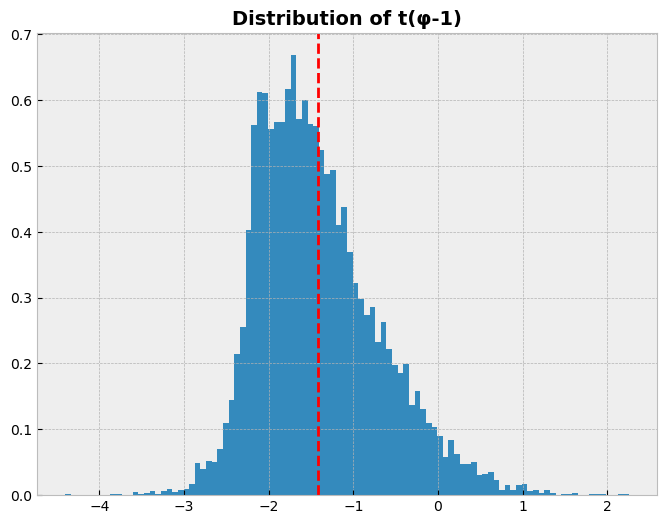

The critical value corresponding to the quantile at: 0.01 of the distribution when T = 500 is -3.4809409147129786
The critical value corresponding to the quantile at: 0.05 of the distribution when T = 500 is -2.876564548814486
The critical value corresponding to the quantile at: 0.1 of the distribution when T = 500 is -2.5863569679902554


In [7]:
# TODO Q1.7 Assume we redo the simulations, but this time we simulate the following AR(1) process p(i) = 0.2 p(i) + ε(i)

t_stat1_7 = []
y = [0]


# 1. Simulate a time series of T error terms ε(i), t = 1, . . . , T distributed as N(0, 1)
for i in range(N):
    errors = np.random.normal(loc=0, scale=1, size=T)
    
# 2. Compute a time series of prices, assuming that they are driven by a random walk p(i) = p(i) + ε(i)
    for j in range(1, T):
       y.append(y[j-1]+errors[j])
    
# 3. Estimate the AR(1) model p(i) = μ(i) + ø(i)p(i) + ε(i)
    AR_1_1_7 = LinearRegression().fit(np.array(y[:-1]).reshape(-1,1),y[1:])
    teta1_7 = AR_1_1_7.coef_[0]
    residuals1_7 = np.array(y[1:]) - teta1_7 * np.array(y[:-1])
    
# 4. Compute the test statistic t(ø(i) − 1) for the null hypothesis of the DF test
    var1_7 = (1 /(T-2)) * np.sum(np.power(residuals1_7, 2))
    t_stat1_7.append((teta1_7 - 1) / (np.power(var1_7 / np.sum(np.power(y[:-1] - np.mean(y),2)), 0.5)))
    y = [100]
    
    
# Q1.7 Plot an histogram for AR(1) process p(i) = φ p(i) + ε(i)
plt.style.use('bmh')
plt.figure(figsize=(8,6))
plt.hist(t_stat1_7, bins=100, density=True)
plt.axvline(pd.Series(t_stat1_7).mean(), color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of t(φ-1)', fontsize=14, fontweight="bold")
plt.savefig("1.7 T_stat.jpeg")
plt.show()


# TODO Redo the simulation for T = 500
t_stat500 = []
z500 = [100]
for k in range(10000):
    errors500 = np.random.normal(loc=0, scale=1, size=T)
    for j in range(1, 500):
        z500.append(z500[j - 1] + errors500[j])
    x500 = sm.add_constant(np.array(z500[:-1]))
    y500 = np.array(z500[1:])
    model500 = sm.OLS(y500, x500)
    results500 = model500.fit()
    a500 = results500.params[0]
    b500 = results500.params[1]
    residuals500 = np.array(z500[1:]) - b500 * np.array(z500[:-1] - a500)
    var500 = residuals500.var()
    t_stat500.append((b500 - 1) / (np.power(var500 / np.sum(np.power(z500[:-1] - np.mean(y500),2)), 0.5)))
    z500 = [100]

    
# Find the critical values for T = 500
percentage = [0.01, 0.05, 0.1]
for i in percentage:
    quantile500 = np.quantile(t_stat500, i)
    print("The critical value corresponding to the quantile at: " +
          "{}".format(i) + " of the distribution when T = 500 is " + "{}".format(quantile500))

In [8]:
# 1.2 Testing non-stationarity

# TODO Q1.8 Compute the test statistic and carry out the DF test

# We compute alpha and beta in order to find residuals
regression1_8 = linear_model.LinearRegression()
parameters_estimated1_8 = []
residuals1_8 = []
commodities = ['ZC', 'ZW', 'ZC', 'KC', 'CC']
for asset in range(5):
    regression1_8.fit(np.array(log_prices.iloc[1:, asset]).reshape(-1, 1), log_prices.iloc[:-1, asset])
    parameters_estimated1_8.append([regression1_8.intercept_, regression1_8.coef_[0]])
    residuals1_8.append(np.array(log_prices.iloc[:-1, asset])-regression1_8.coef_[0]*np.array(log_prices.iloc[1:, asset])-regression1_8.intercept_)
#   print("The intercept and coefficient for " + "{}".format(Stocks[asset]) + " are equal to: " + "{}" .format(DF_test_carry_out[asset]))


# TODO: Compute the test statistic
t_stat1_8 = []
p_value1_8 = []
for asset in range(5):
    teta1_8 = parameters_estimated1_8[asset][1]
    var1_8 = residuals1_8[:][asset].var()
    stat1_8 = (teta1_8-1)/(np.power(var1_8/np.sum(np.power(log_prices.iloc[1:, asset]-np.mean(log_prices.iloc[:, asset]), 2)), 0.5))
    t_stat1_8.append(stat1_8)
    print("The test statistic for " + "{}".format(commodities[asset]) + " is equal to: " + "{}" .format(t_stat1_8[asset]))

    
# TODO: To compute the p-value, use the distribution t(φ(i) − 1) plotted in Q1.5
    w = 0
    for i in range(len(t_stat1_5)):
        if t_stat1_5[i - 1] <= stat1_8:
            w += 1
    p_value = w / len(t_stat1_5)
    p_value1_8.append(p_value)
    print("The p-value for " + "{}".format(commodities[asset]) + " is equal to: " + "{}" .format(p_value1_8[asset]))

The test statistic for ZC is equal to: -2.8033747553736816
The p-value for ZC is equal to: 0.003
The test statistic for ZW is equal to: -2.794748814621861
The p-value for ZW is equal to: 0.003
The test statistic for ZC is equal to: -2.1454603528100313
The p-value for ZC is equal to: 0.0309
The test statistic for KC is equal to: -2.842126414224988
The p-value for KC is equal to: 0.0029
The test statistic for CC is equal to: -2.5028507116698053
The p-value for CC is equal to: 0.0088


# PART 2 - Cointegration

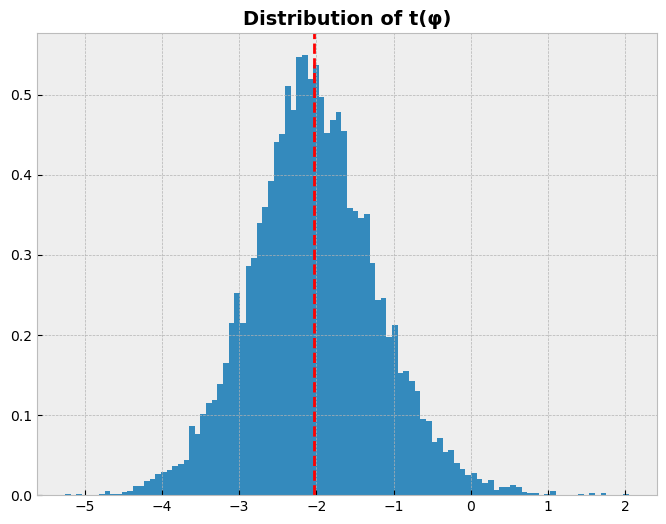

The critical value corresponding to the quantile at: 0.01is -3.933759567666112
The critical value corresponding to the quantile at: 0.05is -3.3439482229096322
The critical value corresponding to the quantile at: 0.1is -3.0439368648292655
The critical value corresponding to the quantile at: 0.01 of the distribution when T = 500 is -3.8996168519047076
The critical value corresponding to the quantile at: 0.05 of the distribution when T = 500 is -3.376006559021132
The critical value corresponding to the quantile at: 0.1 of the distribution when T = 500 is -3.0647389575654715


In [9]:
# We define a function to estimate linear relationship

def estimate_linear_relationship(serie1, serie2):
    x = sm.add_constant(np.array((serie2)))
    y = np.array((serie1))
    model = sm.OLS(y, x)
    results = model.fit()
    alpha = results.params[0]
    beta = results.params[1]
    return x, y, alpha, beta
    
# 2.1 Critical values

# TODO: Q2.1 Plot an histogram of the distribution of t(φ(i)) and report the critical values
ptA = [100]
ptB = [100]
alpha2_1 = []
beta2_1 = []
t_stat2_1 = []
i = 0

# 1) Simulate two time series of independant random walks ptA and ptB
for t in range(10000):
    errors1 = np.random.normal(0, 1, T)
    errors2 = np.random.normal(0, 1, T)
    for j in range(1, T):
        ptA.append(ptA[j-1]+errors1[j])
        ptB.append(ptB[j-1]+errors2[j])

# 2) Estimate the linear relationship between ptA and ptB
    x, y, alpha, beta = estimate_linear_relationship(ptA, ptB)
    alpha2_1.append(alpha)
    beta2_1.append(beta)
    Z = y - alpha - beta * x[:,1]
    Z = np.array(Z)
    deltaZ = np.array([1])
    for i in range(1, T):
        if i == 1:
            deltaZ = Z[i] - Z[i - 1]
        else:
            deltaZ = np.append(deltaZ, [Z[i] - Z[i - 1]])

# 3) Estimate the AR(1) for the residuals
    x = sm.add_constant(np.transpose(Z))
    y = np.array(np.transpose(deltaZ))
    x = np.delete(x, (T-1), 0)
    model = sm.OLS(y, x)
    results = model.fit()
    errors2 = y - results.params[1] * x[:, 1] - results.params[0]

# Compute the corresponding t-stat
    var = errors2.var()
    t_stat = (results.params[1]) / (np.power(var / np.sum(np.power(x[:, 1] - np.mean(x[:, 1]), 2)),0.5))
    t_stat2_1.append(t_stat)
    t_stat2_1
    i+=1
    ptA = [100]
    ptB = [100]

# Get the distribution of the t-stat of the estimate of the residuals
plt.style.use('bmh')
plt.figure(figsize=(8,6))
plt.hist(t_stat2_1, bins=100, density=True)
plt.axvline(pd.Series(t_stat2_1).mean(), color='r', linestyle='dashed', linewidth=2)
plt.title('Distribution of t(φ)', fontsize=14, fontweight="bold")
plt.savefig("2.1 T_stat.pdf")
plt.show()

# Find the critical values
percentages = [0.01, 0.05, 0.1]
for i in percentages:
    quantile_2_1 = np.quantile(t_stat2_1, i)
    print("The critical value corresponding to the quantile at: " +
          "{}".format(i) + "is " + "{}".format(quantile_2_1))

# TODO Redo the simulation for T = 500
ptA = [100]
ptB = [100]
t_stat_500 = []

for k in range(10000):
    errors1 = np.random.normal(0, 1, T)
    errors2 = np.random.normal(0, 1, T)
    for j in range(1, 500):
        ptA.append(ptA[j - 1] + errors1[j])
        ptB.append(ptB[j - 1] + errors2[j])

# Estimate the linear relationship between ptA and ptB
    x, y, alpha, beta = estimate_linear_relationship(ptA, ptB)
    Z = y - alpha - beta * x[:, 1]
    Z = np.array(Z)
    deltaZ = np.array([1])
    for i in range(1, 500):
        if i == 1:
            deltaZ = Z[i] - Z[i - 1]
        else:
            deltaZ = np.append(deltaZ, [Z[i] - Z[i - 1]])

# Estimate the AR(1) for the residuals
    x = sm.add_constant(np.transpose(Z))
    y = np.array(np.transpose(deltaZ))
    x = np.delete(x, 499, 0)
    model = sm.OLS(y, x)
    results = model.fit()
    errors2 = y - results.params[1] * x[:, 1] - results.params[0]

    # Compute the corresponding t-stat
    var = errors2.var()
    stat_500 = (results.params[1]) / (np.power(var / np.sum(np.power(x[:, 1] - np.mean(x[:, 1]), 2)), 0.5))
    t_stat_500.append(stat_500)
    t_stat_500
    i += 1
    ptA = [100]
    ptB = [100]

# Find the critical values for T = 500
percentages = [0.01, 0.05, 0.1]
for i in percentages:
    quantile_3 = np.quantile(t_stat_500, i)
    print("The critical value corresponding to the quantile at: " +
          "{}".format(i) + " of the distribution when T = 500 is " + "{}".format(quantile_3))

In [10]:
# TODO: 2.2 Test for cointegration on each pair of assets
pairs = [[0,1],[1,0],[0,2],[2,0],[0,3],[3,0],[0,4],[4,0],[1,2],[2,1],[1,3],[3,1],[1,4],[4,1],[2,3],[3,2],[2,4],[4,2],[3,4],[4,3]]
alpha2_2 = []
beta2_2 = []
t_stat2_2 = []
j = 0

for pair in pairs:
    PtB, PtA, a, b = estimate_linear_relationship(log_prices.iloc[:, pair[0]], log_prices.iloc[:, pair[1]])
    alpha2_2.append(a)
    beta2_2.append(b)

    Zt2_2 = PtA - alpha2_2[j] - beta2_2[j] * PtB[:, 1]
    Zt2_2 = np.array(Zt2_2)
    deltaZt2_2 = np.array([1])
    for i in range(1, T):
        if i == 1:
            deltaZt2_2 = Zt2_2[i] - Zt2_2[i - 1]
        else:
            deltaZt2_2 = np.append(deltaZt2_2, [Zt2_2[i] - Zt2_2[i - 1]])

    x2_2 = sm.add_constant(np.transpose(Zt2_2))
    y2_2 = np.array(np.transpose(deltaZt2_2))
    x2_2 = np.delete(x2_2, (T-1), 0)

    model2_2 = sm.OLS(y2_2, x2_2)
    results2_2 = model2_2.fit()
    errors2_2 = y2_2 - results2_2.params[1] * x2_2[:, 1] - results2_2.params[0]

    # Compute the t-stat for each pair
    var2_2 = errors2_2.var()
    tstat22 = (results2_2.params[1]) / (np.power(var2_2 / np.sum(np.power(x2_2[:, 1] - np.mean(x2_2[:, 1]), 2)),0.5))
    t_stat2_2.append(tstat22)
    j += 1
    print("{}".format(pair) + "{}".format(t_stat2_2[-1]))

    # Get the p-value for each pair
    x = 0
    for i in range(len(t_stat2_1)):
        if t_stat2_1[i-1] <= tstat22:
            x += 1
    p_value2_2 = x/len(t_stat2_1)
    print("The p-value for the pair " + "{}".format(pair) + " is " + "{}".format(p_value2_2))
    print("{}".format(p_value2_2))

    
#TODO: Q2.3 Report the parameters estimates alpha and beta
print("Alpha =",alpha2_2)
print("Beta =",beta2_2)


#TODO: Q2.4 Which pair is the most strongly cointegrated
dico = {'Pairs': pairs,
        'T-Stat': t_stat2_2}
dico = pd.DataFrame(dico)
# Find the pair with the lowest T-Stat, which is the most strongly cointegrated
Most_coin = dico['T-Stat'].min()
df3 = log_prices[['Corn Futures','Wheat Futures']]
print(df3)

[0, 1]-3.1444351209928296
The p-value for the pair [0, 1] is 0.0778
0.0778
[1, 0]-3.5408920926347482
The p-value for the pair [1, 0] is 0.0299
0.0299
[0, 2]-2.9755603451211683
The p-value for the pair [0, 2] is 0.1163
0.1163
[2, 0]-3.1263039999846343
The p-value for the pair [2, 0] is 0.0813
0.0813
[0, 3]-2.1277281047215633
The p-value for the pair [0, 3] is 0.461
0.461
[3, 0]-2.3184161508919012
The p-value for the pair [3, 0] is 0.3612
0.3612
[0, 4]-1.1409424812315132
The p-value for the pair [0, 4] is 0.8654
0.8654
[4, 0]-2.51367559858002
The p-value for the pair [4, 0] is 0.2679
0.2679
[1, 2]-2.9283927592572137
The p-value for the pair [1, 2] is 0.1272
0.1272
[2, 1]-2.5973479159804493
The p-value for the pair [2, 1] is 0.234
0.234
[1, 3]-2.734813781355467
The p-value for the pair [1, 3] is 0.1832
0.1832
[3, 1]-2.391056476581426
The p-value for the pair [3, 1] is 0.325
0.325
[1, 4]-1.9338504227344515
The p-value for the pair [1, 4] is 0.5632
0.5632
[4, 1]-2.564696905000454
The p-valu

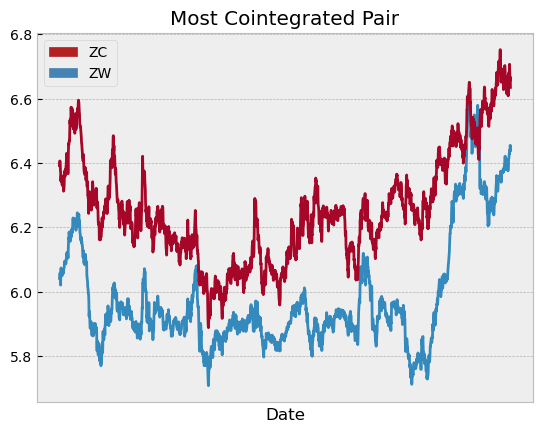

In [152]:
# TODO: Q2.5 Plot the time series of the prices of this pair of assets on the same graph
# The most cointegrated pair of assets are ZC: Corn Futures and ZW: Wheat Futures 

plt.plot(df3)
plt.title("Most Cointegrated Pair")
red_patch = mpatches.Patch(color='firebrick', label='ZC')
blue_patch = mpatches.Patch(color='steelblue', label='ZW')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig("2.5 Most cointegrated pair.pdf")
plt.xlabel('Date')
plt.xticks([])
plt.savefig('mostcointegrated.pdf')
plt.show()

# PART 3 - Pair trading

### 3.1 Trading Signal 

In [156]:
# Most cointegrated pair
trade_pair = {'Corn Futures': df2['Corn Futures'], 'Wheat Futures': df2['Wheat Futures']}
trade_pair = pd.DataFrame(trade_pair)

# Estimate the linear relationship between Corn futures and Wheat futures 
def spread(pair_a, pair_b):
    """if len(pair_a.shape) == 1:
        pair_a = pair_a.to_numpy().reshape(-1,1)

    if len(pair_b.shape) == 1:
        pair_b = pair_b.to_numpy().reshape(-1,1)"""
        
    regression = linear_model.LinearRegression()
    regression.fit(pair_b, pair_a)
    alpha = regression.intercept_[0]
    beta = regression.coef_[0][0]
    spr = pair_a - pair_b * beta - alpha
    std = np.std(spr)
    signal = spr / std
    return signal, alpha, beta, std

x = np.array(trade_pair['Corn Futures'].values).reshape(-1,1)
y = np.array(trade_pair['Wheat Futures'].values).reshape(-1, 1)
spread_res = spread(x, y)

# Obtain signals
signals = spread_res[0]
alpha = spread_res[1]
beta = spread_res[2]
std = spread_res[3]
signals = pd.DataFrame(signals, index=trade_pair.index)

dummy_values = np.arange(0,2030,406)
idxt = trade_pair.index.values
beta

0.7185742599759206

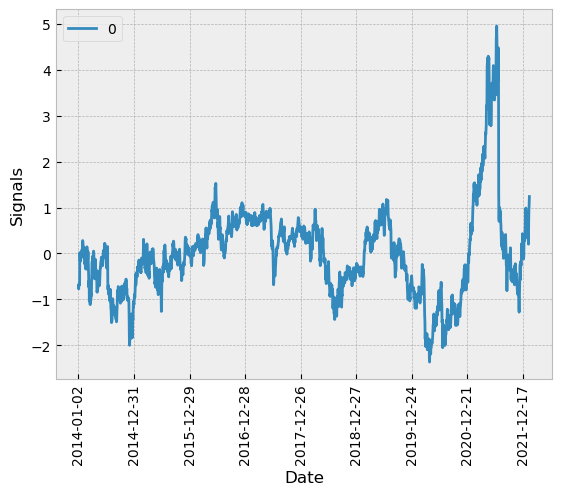

In [16]:
# Plot signals
ax = plt.gca()
signals.plot(ax=ax)
plt.xlabel('Date')
plt.ylabel('Signals')
plt.xticks(rotation=90);

In [18]:
signals

,0
Date,
2014-01-02,-0.699992
2014-01-03,-0.772854
2014-01-06,-0.678660
2014-01-07,-0.665686
2014-01-08,-0.646174
...,...
2022-01-25,0.201942
2022-01-26,0.723380
2022-01-27,0.971261


#### 3.2.1 Direct Strategy

##### Leverage = 2

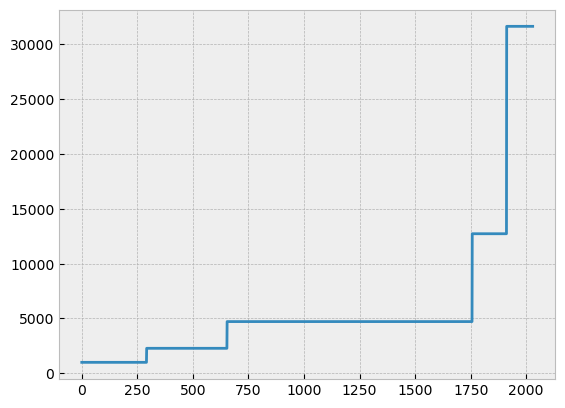

In [79]:
W = 1000
L1 = 2

pa = trade_pair['Wheat Futures'].values
pb = trade_pair['Corn Futures'].values

zin = 1.5
action = 'none'
na = 0
nb = 0

ws = []
signal_decision = []
position_decision = []

processed = False
position = 'nothing'
Wt = W
for i, s in enumerate(signals.values):
    if action == 'none':
        if s > zin:
            action = 'signal_1'
        elif s < -zin:
            action = 'signal_2'
        else:
            pass

    if action == 'signal_1':
        if s <= 0:
            Wt += (- na * pa[i] + nb * pb[i]) 
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na -= Wt * L1 / (1 + L1) / pa[i]
                nb += Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig1'
            else:
#                 Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig1'

    if action == 'signal_2':
        if s >= 0:
            Wt += (na * pa[i] - nb * pb[i])
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na += Wt * L1 / (1 + L1) / pa[i]
                nb -= Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig2'
            else:
#                 Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig2'
    ws.append(Wt)
    signal_decision.append(action)
    position_decision.append(position)
#     print(Wt, na, nb)

ax = plt.gca()
ax.plot(ws)

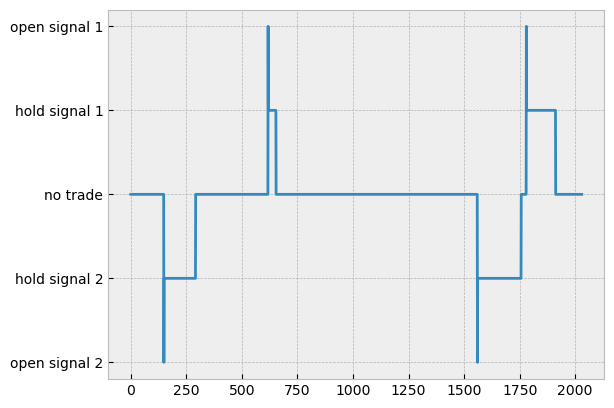

In [80]:
digital_position_decision = []
for i in position_decision:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision.append(d)

ax = plt.gca()
ax.plot(digital_position_decision)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])

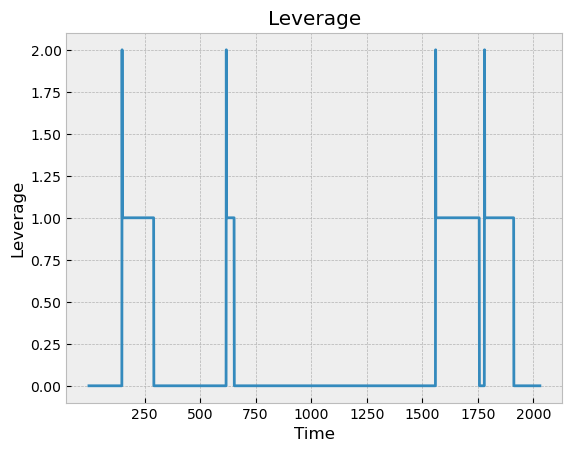

In [81]:
leverage = np.abs(digital_position_decision)
plt.figure()
plt.plot(signals.index, leverage)
plt.title("Leverage")
plt.ylabel("Leverage")

# Set x-ticks to show every 250 data points
start_index = 250
end_index = 2000
xticks = signals.index[start_index:end_index+1:250]

# Format x-tick labels
xtick_labels = list(range(250, 2001, 250))

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time")
plt.savefig('leverage=2.pdf')

In [24]:
# Performance with L=2
final_wealth = ws[-1]
profit = ws[-1] - ws[0]
lowest_ws = min(ws)
max_ws = max(ws)

print(profit, lowest_ws, max_ws)

30627.18141530262 1000 31627.18141530262


In [101]:
num_trade2 = 0

for i in digital_position_decision:
    if i == 2 or i == -2:
        num_trade2 += 1
        
num_trade2 = 2*num_trade2
num_trade2

8

In [26]:
digital_position_decision

num_trade = 0

for i in digital_position_decision:
    if i==2 or i==-2:
        num_trade += 1

num_trade

4

In [28]:
signal_decision_l1 = pd.DataFrame(signal_decision, index=signals.index)
position_decision_l1 = pd.DataFrame(position_decision, index=signals.index)

##### L = 20

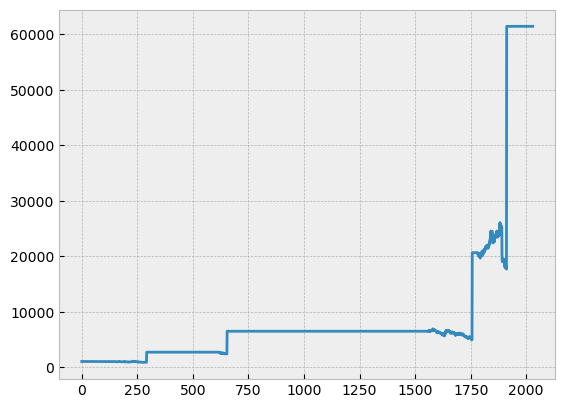

In [74]:
W = 1000
L2 = 20

pa = trade_pair['Wheat Futures'].values
pb = trade_pair['Corn Futures'].values

zin = 1.5
action = 'none'
na = 0
nb = 0

ws = []
signal_decision20 = []
position_decision20 = []

processed = False
position = 'nothing'

Wt = W
for i, s in enumerate(signals.values):
    if action == 'none':
        if s > zin:
            action = 'signal_1'
        elif s < -zin:
            action = 'signal_2'
        else:
            pass

    if action == 'signal_1':
        if s <= 0:
            Wt += (- na * pa[i] + nb * pb[i]) 
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na -= Wt * L2 / (1 + L2) / pa[i]
                nb += Wt * L2 / (1 + L2) / pb[i]
                processed = True
                position = 'open sig1'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig1'

    if action == 'signal_2':
        if s >= 0:
            Wt += (na * pa[i] - nb * pb[i])
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na += Wt * L2 / (1 + L2) / pa[i]
                nb -= Wt * L2 / (1 + L2) / pb[i]
                processed = True
                position = 'open sig2'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig2'
    ws.append(Wt)
    signal_decision20.append(action)
    position_decision20.append(position)
#     print(W, na, nb)

ax = plt.gca()
ax.plot(ws)

In [32]:
# Performance with L=20
final_wealth = ws[-1]
profit = ws[-1] - ws[0]
lowest_ws = min(ws)
max_ws = max(ws)
print(profit, lowest_ws, max_ws)

60432.87012644902 845.488681111676 61432.87012644902


Text(0.5, 0, 'Date')

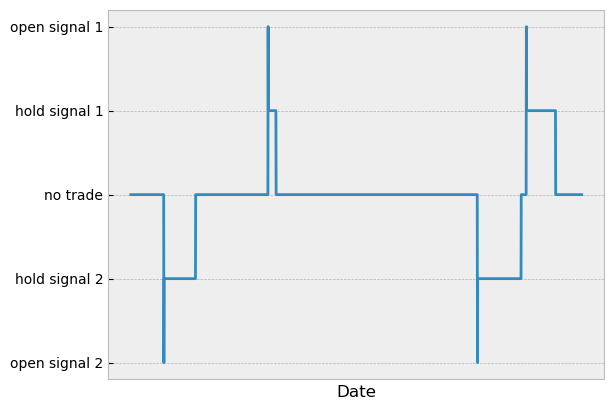

In [77]:
digital_position_decision20 = []
for i in position_decision20:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision20.append(d)

ax = plt.gca()
ax.plot(digital_position_decision20)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')

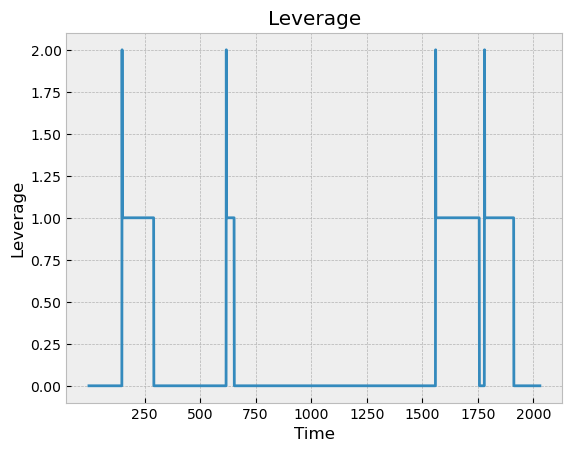

In [78]:
leverage = np.abs(digital_position_decision20)
plt.figure()
plt.plot(signals.index, leverage)
plt.title("Leverage")
plt.ylabel("Leverage")

# Set x-ticks to show every 250 data points
start_index = 250
end_index = 2000
xticks = signals.index[start_index:end_index+1:250]

# Format x-tick labels
xtick_labels = list(range(250, 2001, 250))

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time")
plt.savefig('leverage=20.pdf')

In [36]:
digital_position_decision20

num_trade = 0

for i in digital_position_decision20:
    if i==2 or i==-2:
        num_trade += 1
        
num_trade

4

### 3.2.2 Stop Loss

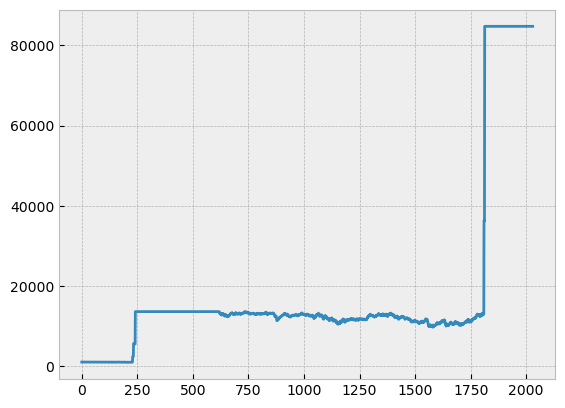

In [38]:
# Stop loss at 1.75
W = 1000
L1 = 2

pa = trade_pair['Wheat Futures'].values
pb = trade_pair['Corn Futures'].values

zin = 1.5
zstop = 1.75
action = 'none'
na = 0
nb = 0

ws = []
signal_decision_stop1 = []
position_decision_stop1 = []

processed = False
position = 'nothing'
Wt = W
for i, s in enumerate(signals.values):
    if action == 'none':
        if s > zin:
            action = 'signal_1'
        elif s < -zin:
            action = 'signal_2'
        else:
            pass

    if action == 'signal_1':
        if s > zstop:
            Wt += (- na * pa[i] + nb * pb[i]) 
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na -= Wt * L1 / (1 + L1) / pa[i]
                nb += Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig1'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig1'
    if action == 'signal_2':
        if s < -zstop:
            Wt += (na * pa[i] - nb * pb[i])
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na += Wt * L1 / (1 + L1) / pa[i]
                nb -= Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig2'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig2'
    ws.append(Wt)
    signal_decision_stop1.append(action)
    position_decision_stop1.append(position)
#     print(Wt, na, nb)

ax = plt.gca()
ax.plot(ws)

In [40]:
# Performance with stop loss limit
final_wealth = ws[-1]
profit = ws[-1] - ws[0]
lowest_ws = min(ws)
max_ws = max(ws)
print(profit, lowest_ws, max_ws)

83741.7093557004 929.2731324861304 84741.7093557004


Text(0.5, 0, 'Date')

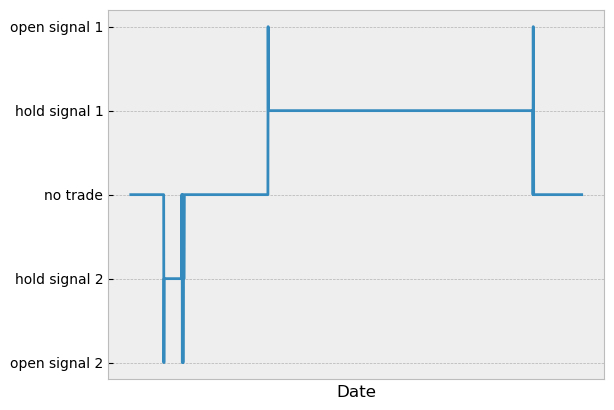

In [42]:
digital_position_decision_stop1 = []
for i in position_decision_stop1:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision_stop1.append(d)

ax = plt.gca()
ax.plot(digital_position_decision_stop1)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')

In [44]:
signal_decision_loss = pd.DataFrame(signal_decision, index=signals.index)
position_decision_loss = pd.DataFrame(position_decision, index=signals.index)

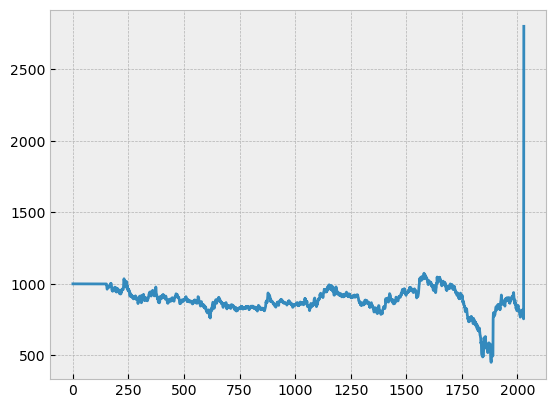

In [46]:
# Stop loss at 2.75
W = 1000
L1 = 2

pa = trade_pair['Wheat Futures'].values
pb = trade_pair['Corn Futures'].values

zin = 1.5
zstop = 2.75
action = 'none'
na = 0
nb = 0

ws = []
signal_decision_stop2 = []
position_decision_stop2 = []

processed = False
position = 'nothing'
Wt = W
for i, s in enumerate(signals.values):
    if action == 'none':
        if s > zin:
            action = 'signal_1'
        elif s < -zin:
            action = 'signal_2'
        else:
            pass

    if action == 'signal_1':
        if s > zstop or (i == (len(signals) - 1)):  # also close the position on the final day
            Wt += (- na * pa[i] + nb * pb[i]) 
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na -= Wt * L1 / (1 + L1) / pa[i]
                nb += Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig1'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig1'
    if action == 'signal_2':
        if s < -zstop or (i == (len(signals) - 1)):  # also close the position on the final day
            Wt += (na * pa[i] - nb * pb[i])
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na += Wt * L1 / (1 + L1) / pa[i]
                nb -= Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig2'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig2'
  
            
    ws.append(Wt)
    signal_decision_stop2.append(action)
    position_decision_stop2.append(position)
#     print(Wt, na, nb)

ax = plt.gca()
ax.plot(ws)

Text(0.5, 0, 'Date')

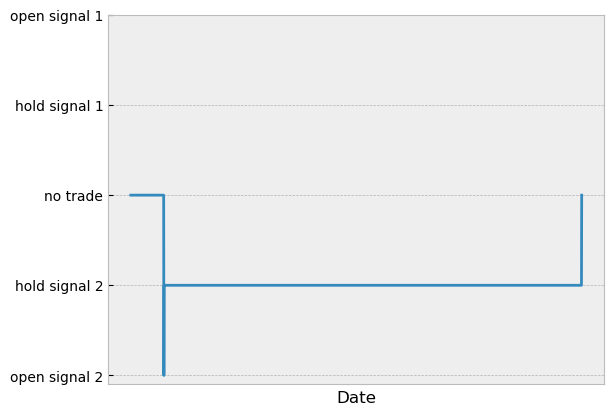

In [48]:
digital_position_decision_stop2 = []
for i in position_decision_stop2:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision_stop2.append(d)

ax = plt.gca()
ax.plot(digital_position_decision_stop2)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')

### 3.3 Out-of-Sample Pair-trading Strategy 

In [ ]:
obs_win = 500
roll_win = 20

start = 0
rolling = True
roll_sig = []
roll_alpha = []
roll_beta = []
roll_corr = []
roll_return_corr = []


W_coint = 1000
W_out = 1000
L_coint = 2
na_coint = 0
nb_coint = 0
Wt_coint_res = []
Wt_out_res = []

na_out = 0
nb_out = 0
signal_decision_out = []
position_decision_out = []

signal_decision_roll = []
position_decision_roll = []

processed = False
position = 'nothing'
Wt_out = W_out
Wt_coint = W_coint

roll_coint_res = {
    'tstat': [], 
    'pvalue': [],
    'critical value 1%': [],
    'critical value 5%': [], 
    'critical value 10%': []
    }

while rolling:
    obs = trade_pair.iloc[start:(start + obs_win)]
    prc = trade_pair.iloc[(start + obs_win): (start + obs_win + roll_win)]
    
    # Getting alpha, beta and spread
    _, alpha, beta, std = spread(pair_a=obs['Corn Futures'].values.reshape(-1, 1),
                                 pair_b=obs['Wheat Futures'].values.reshape(-1, 1))
    pa_roll = prc['Corn Futures']
    pb_roll = prc['Wheat Futures']
    zt = pa_roll - alpha - beta * pb_roll
    zt_hat = zt/std
    roll_sig.append(zt_hat)
    roll_alpha.append(alpha)
    roll_beta.append(beta)
    
    # Correlation between the prices
    roll_corr.append(obs['Corn Futures'].corr(obs['Wheat Futures']))
    
    # Cointegration
    tstat, pval, cv = sm.tsa.coint(obs['Corn Futures'], obs['Wheat Futures'])
    roll_coint_res['tstat'].append(tstat)
    roll_coint_res['pvalue'].append(pval)
    roll_coint_res['critical value 1%'].append(cv[0])
    roll_coint_res['critical value 5%'].append(cv[1])
    roll_coint_res['critical value 10%'].append(cv[2])
    
    
    # Correlation between returns of the prices
    a_logreturn = np.log(prc['Corn Futures']/prc['Corn Futures'].shift(1))
    b_logreturn = np.log(prc['Wheat Futures']/prc['Wheat Futures'].shift(1))
    roll_return_corr.append(a_logreturn.corr(b_logreturn))
    
    
    #3.10 Same trading as before (Doest not yet test for cointegration)
    for i, s in enumerate(zt_hat):
        if action == 'none':
            if s > zin:
                action = 'signal_1'
            elif s < -zin:
                action = 'signal_2'
            else:
                pass

        if action == 'signal_1':
            if s > zstop or (i == (len(signals) - 1)):  # also close the position on the final day
                Wt_out += (- na_out * pa[i] + nb_out * pb[i]) 
                na_out = 0
                nb_out = 0
                action = 'none'
                processed = False
                position = 'nothing'
            else:
                if not processed:
                    na_out -= Wt * L1 / (1 + L1) / pa[i]
                    nb_out += Wt * L1 / (1 + L1) / pb[i]
                    processed = True
                    position = 'open sig1'
                else:
                    Wt_out += (na_out * (pa[i]-pa[i-1]) + nb_out * (pb[i]-pb[i-1]))
                    position = 'hold sig1'
        if action == 'signal_2':
            if s < -zstop or (i == (len(signals) - 1)):  # also close the position on the final day
                Wt_out += (na_out * pa[i] - nb_out * pb[i])
                na_out = 0
                nb_out = 0
                action = 'none'
                processed = False
                position = 'nothing'
            else:
                if not processed:
                    na_out += Wt * L1 / (1 + L1) / pa[i]
                    nb_out -= Wt * L1 / (1 + L1) / pb[i]
                    processed = True
                    position = 'open sig2'
                else:
                    Wt_out += (na_out * (pa[i]-pa[i-1]) + nb_out * (pb[i]-pb[i-1]))
                    position = 'hold sig2'
        Wt_out_res.append(Wt_out)
        signal_decision_out.append(action)
        position_decision_out.append(position)
    
    
    # 3.11 Pair trading subject to cointegration
    is_coint = pval < 0.05
    
    for i, s in enumerate(zt_hat):
        if action == 'none':
            if s > zin:
                action = 'signal_1'
            elif s < -zin:
                action = 'signal_2'
            else:
                pass

        if action == 'signal_1':
            if s > zstop:
                Wt_coint += (- na_coint * pa_roll[i] + nb_coint * pb_roll[i]) 
                na_coint = 0
                nb_coint = 0
                action = 'none'
                processed = False
                position = 'close sig1'
            else:
                if not processed and is_coint:
                    na_coint -= Wt_coint * L1 / (1 + L1) / pa_roll[i]
                    nb_coint += Wt_coint * L1 / (1 + L1) / pb_roll[i]
                    processed = True
                    position = 'open sig1'
                else:
                    if not is_coint:
                        Wt_coint += (- na_coint * pa_roll[i] + nb_coint * pb_roll[i]) 
                        na_coint = 0
                        nb_coint = 0
                        action = 'none'
                        processed = False
                        position = 'close sig1'
                    else:
                        Wt_coint += (na_coint * (pa_roll[i]-pa_roll[i-1]) + nb_coint * (pb_roll[i]-pb_roll[i-1]))
                        position = 'hold sig1'
        if action == 'signal_2':
            if s < -zstop:
                Wt_coint += (na_coint * pa_roll[i] - nb_coint * pb_roll[i])
                na_coint = 0
                nb_coint = 0
                action = 'none'
                processed = False
                position = 'close sig2'
            else:
                if not processed and is_coint:
                    na_coint += Wt_coint * L1 / (1 + L1) / pa_roll[i]
                    nb_coint -= Wt_coint * L1 / (1 + L1) / pb_roll[i]
                    processed = True
                    position = 'open sig2'
                else:
                    if not is_coint:
                        Wt_coint += (na_coint * pa_roll[i] - nb_coint * pb_roll[i])
                        na_coint = 0
                        nb_coint = 0
                        action = 'none'
                        processed = False
                        position = 'close sig2'
                    else:
                        Wt_coint += (na_coint * (pa_roll[i]-pa_roll[i-1]) + nb_coint * (pb_roll[i]-pb_roll[i-1]))
                        position = 'hold sig2'
        Wt_coint_res.append(Wt_coint)
        signal_decision_roll.append(action)
        position_decision_roll.append(position)
    start += roll_win
    
    if (start + obs_win + roll_win) >= len(trade_pair):
        rolling = False
    
roll_sig = pd.concat(roll_sig)
roll_coint_res = pd.DataFrame(roll_coint_res)


In [ ]:
ax = plt.gca()
ax.plot(Wt_out_res)

In [ ]:
# 3.10 Performance with Rolling and without Cointegration 
final_wealth_out = Wt_out_res[-1]
profit_out = Wt_out_res[-1] - Wt_out_res[0]
lowest_ws_out = min(Wt_out_res)
# max_ws_out = max(Wt_out_res)
print(profit_out, lowest_ws_out, max_ws_out, final_wealth_out)

In [185]:
# 3.11 Performance with Rolling and Cointegration
final_wealth_coint = Wt_coint_res[-1]
profit_coint = Wt_coint_res[-1] - Wt_coint_res[0]
lowest_ws_coint = min(Wt_coint_res)
max_ws_coint = max(Wt_coint_res)
print(profit_coint, lowest_ws_coint, max_ws_coint, final_wealth_coint)

1341.3006998349874 1000 2341.3006998349874 2341.3006998349874


Text(0.5, 0, 'Date')

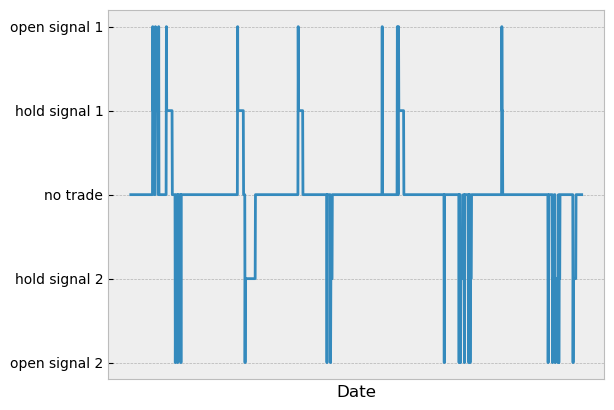

In [134]:
digital_position_decision_out = []
for i in position_decision_out:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision_out.append(d)

ax = plt.gca()
ax.plot(digital_position_decision_out)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')
plt.savefig

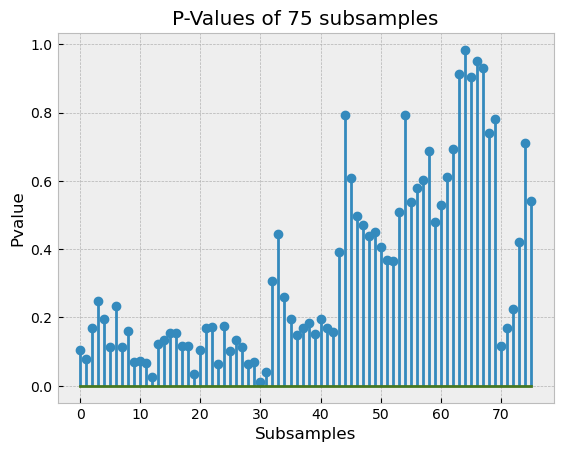

In [52]:
plt.stem(roll_coint_res.pvalue) 
plt.title('P-Values of 75 subsamples') 
plt.xlabel('Subsamples') 
plt.ylabel('Pvalue') 
plt.show()

In [ ]:
digital_position_decision_roll = []
for i in position_decision_roll:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision_roll.append(d)

ax = plt.gca()
ax.plot(digital_position_decision_roll)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')
plt.savefig('rollingcoint.pdf')

Text(0, 0.5, 'Correlation')

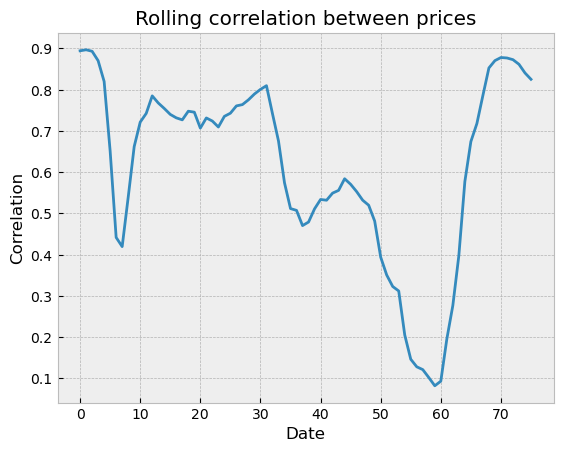

In [142]:
ax = plt.gca()
ax.plot(roll_corr)
plt.title('Rolling correlation between prices')
plt.xlabel('Date')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

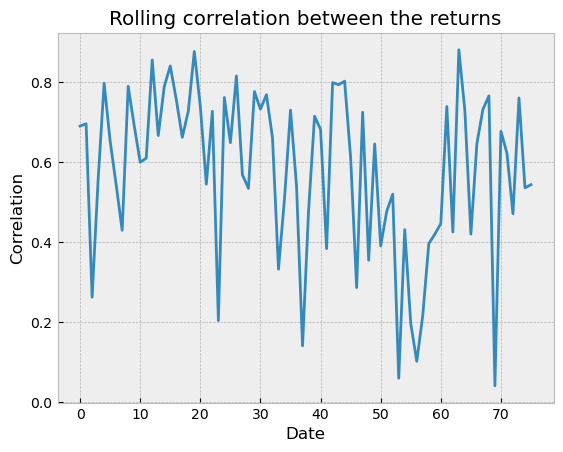

In [56]:
ax = plt.gca()
ax.plot(roll_return_corr)
plt.title('Rolling correlation between the returns')
plt.xlabel('Date')
plt.ylabel('Correlation')

Text(0.5, 0, 'Date')

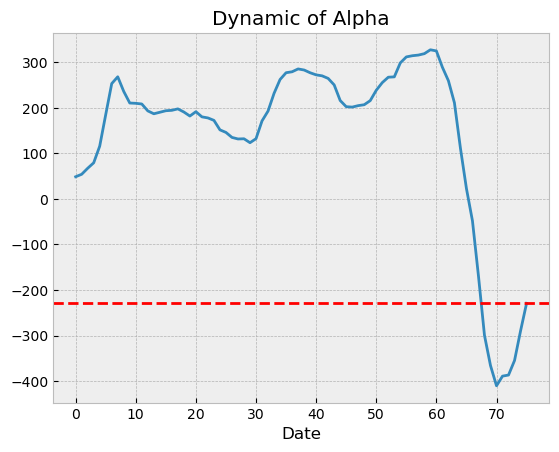

In [118]:
ax = plt.gca()
ax.plot(roll_alpha)
ax.axhline(y=alpha, color='r', linestyle='dashed')
plt.title('Dynamic of Alpha')
plt.xlabel('Date')

Text(0.5, 1.0, 'Dynamic of Beta')

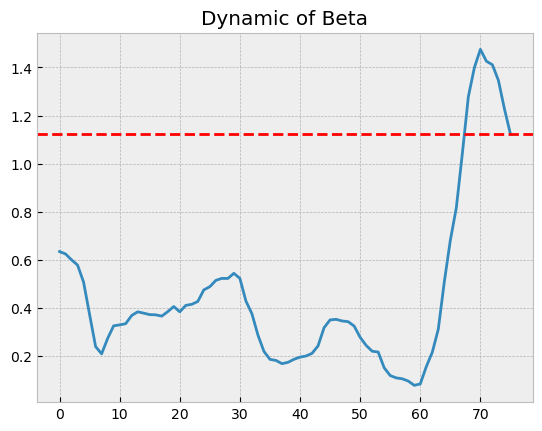

In [58]:
ax = plt.gca()
ax.plot(roll_beta)
ax.axhline(y=beta, color='r', linestyle='dashed')
plt.title('Dynamic of Beta')

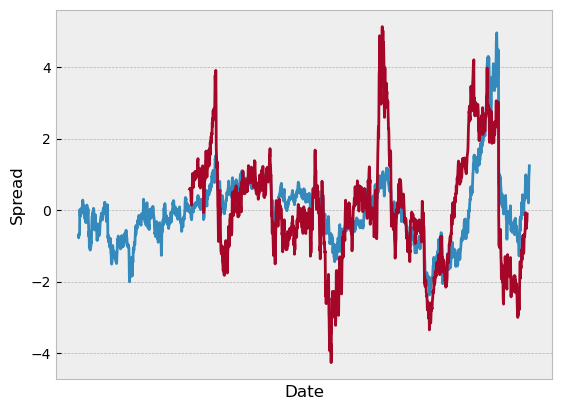

In [147]:
ax  = plt.gca()

ax.plot(signals.index, signals.values)
ax.plot(roll_sig.index, roll_sig.values)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Spread')
plt.savefig('newzts.pdf')

In [60]:
# 3.10 Out of sample pair trading strategy

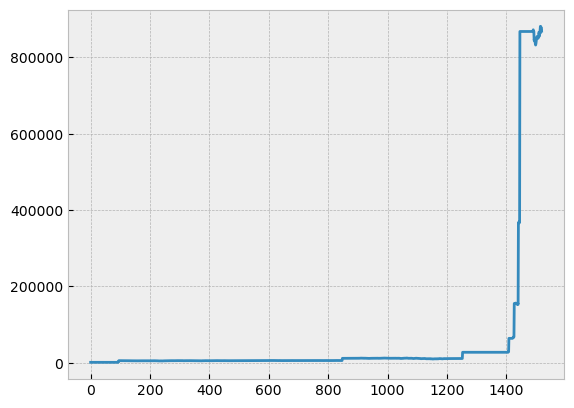

In [122]:
W = 1000
L1 = 2

pa = trade_pair['Wheat Futures'].values
pb = trade_pair['Corn Futures'].values

zin = 1.5
zstop = 1.75
action = 'none'
na = 0
nb = 0

ws = []
signal_decision_out = []
position_decision_out = []

processed = False
position = 'nothing'
Wt = W
for i, s in enumerate(roll_sig.values):
    if action == 'none':
        if s > zin:
            action = 'signal_1'
        elif s < -zin:
            action = 'signal_2'
        else:
            pass

    if action == 'signal_1':
        if s > zstop:
            Wt += (- na * pa[i] + nb * pb[i]) 
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na -= Wt * L1 / (1 + L1) / pa[i]
                nb += Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig1'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig1'
    if action == 'signal_2':
        if s < -zstop:
            Wt += (na * pa[i] - nb * pb[i])
            na = 0
            nb = 0
            action = 'none'
            processed = False
            position = 'nothing'
        else:
            if not processed:
                na += Wt * L1 / (1 + L1) / pa[i]
                nb -= Wt * L1 / (1 + L1) / pb[i]
                processed = True
                position = 'open sig2'
            else:
                Wt += (na * (pa[i]-pa[i-1]) + nb * (pb[i]-pb[i-1]))
                position = 'hold sig2'
    ws.append(Wt)
    signal_decision_out.append(action)
    position_decision_out.append(position)
#     print(Wt, na, nb)

ax = plt.gca()
ax.plot(ws)

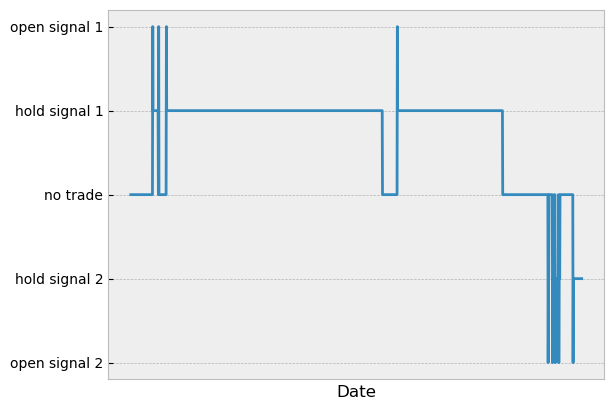

In [124]:
digital_position_decision_out = []
for i in position_decision_out:
    if i == 'nothing':
        d = 0
    elif i == 'hold sig1':
        d = 1
    elif i == 'open sig1':
        d = 2
    elif i == 'hold sig2':
        d = -1
    elif i == 'open sig2':
        d = -2
    digital_position_decision_out.append(d)

ax = plt.gca()
ax.plot(digital_position_decision_out)
ax.set_yticks([-2, -1, 0, 1, 2], ['open signal 2', 'hold signal 2', 'no trade', 'hold signal 1', 'open signal 1'])
ax.set_xticks([])
plt.xlabel('Date')
plt.savefig('outsampletest.pdf')

In [63]:
# Test for cointegration in the subsamples
roll_coint_res['Cointegration SL=1%'] = roll_coint_res.iloc[:, 0] < 0.01
roll_coint_res['Cointegration SL=5%'] = roll_coint_res.iloc[:, 0] < 0.05
roll_coint_res['Cointegration SL=10%'] = roll_coint_res.iloc[:, 0] < 0.1

In [64]:
roll_coint_res

,tstat,pvalue,critical value 1%,critical value 5%,critical value 10%,Cointegration SL=1%,Cointegration SL=5%,Cointegration SL=10%
0,-3.025816,0.104196,-3.918522,-3.348402,-3.05296,True,True,True
1,-3.143938,0.079814,-3.918522,-3.348402,-3.05296,True,True,True
2,-2.790158,0.168836,-3.918522,-3.348402,-3.05296,True,True,True
3,-2.575496,0.246825,-3.918522,-3.348402,-3.05296,True,True,True
4,-2.709675,0.196118,-3.918522,-3.348402,-3.05296,True,True,True
...,...,...,...,...,...,...,...,...
71,-2.788268,0.169446,-3.918522,-3.348402,-3.05296,True,True,True
72,-2.634563,0.223991,-3.918522,-3.348402,-3.05296,True,True,True
73,-2.207224,0.420642,-3.918522,-3.348402,-3.05296,True,True,True
74,-1.624559,0.710413,-3.918522,-3.348402,-3.05296,True,True,True
